In [156]:
from Bio import Entrez, SeqIO
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [157]:
# Initialize a dictionary to store counts of different elements
elements_count = {}
genbank_file = "Bacillus clausii.gb"
records = SeqIO.parse(genbank_file, "genbank")
bacillus_clausii = next(records)

# Iterate over features in each record
for feature in bacillus_clausii.features:
    # Get the type of the feature
    feature_type = feature.type
    # Increment the count for this feature type in the dictionary
    elements_count[feature_type] = elements_count.get(feature_type, 0) + 1

# Print the counts of different elements
for element_type, count in elements_count.items():
    print(f"Number of {element_type}: {count}")

Number of source: 1
Number of gene: 4203
Number of CDS: 4108
Number of rRNA: 22
Number of tRNA: 73
Number of misc_feature: 27


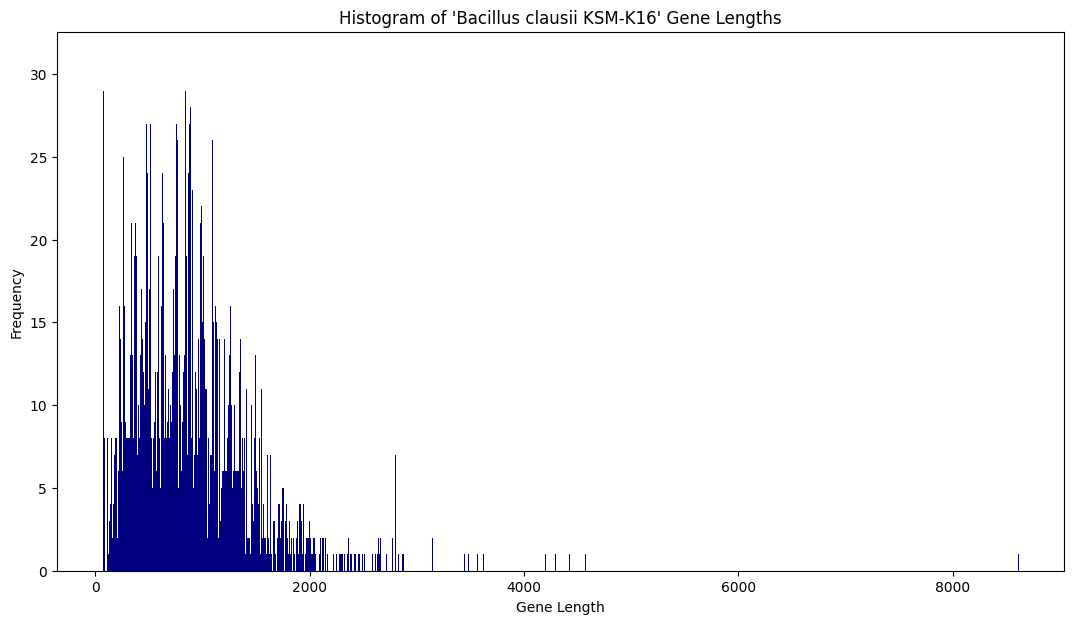

In [158]:
# Now we gonna calculate the length of each gene and plot it
# Initialize variables to store gene lengths and counts
gene_lengths = []
plus_strand_genes = 0
minus_strand_genes = 0

for feature in bacillus_clausii.features:
    if feature.type == "gene":
        # Calculate gene length
        gene_length = abs(feature.location.end - feature.location.start)
        gene_lengths.append(gene_length)
        
        # Check strand and count genes
        if feature.location.strand == 1:
            plus_strand_genes += 1
        elif feature.location.strand == -1:
            minus_strand_genes += 1

# Plot histogram of gene lengths
plt.figure(figsize=(13,7))
plt.hist(gene_lengths, bins=2000, color='navy')
plt.xlabel('Gene Length')
plt.ylabel('Frequency')
plt.title('Histogram of \'Bacillus clausii KSM-K16\' Gene Lengths')
plt.show()




Number of genes on plus strand: 2074
Number of genes on minus strand: 2129
Number of protein coding genes on plus strand: 1998
Number of protein coding genes on minus strand: 2110


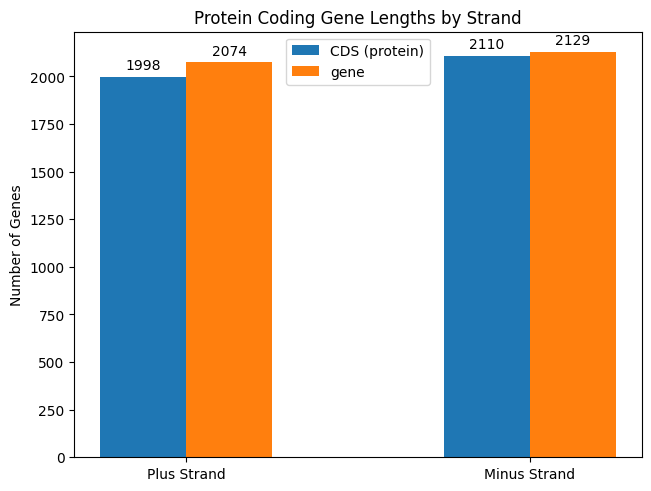

In [159]:
protein_coding_genes_minus_lengths = []
protein_coding_genes_plus_lengths = []
protein_coding_genes_minus_strand = 0
protein_coding_genes_plus_strand = 0

for feature in bacillus_clausii.features:
    if feature.type == "CDS":
        # Calculate gene length
        gene_length = abs(feature.location.end - feature.location.start)
        if feature.location.strand == 1:
            protein_coding_genes_plus_lengths.append(gene_length)
            protein_coding_genes_plus_strand += 1
        elif feature.location.strand == -1:
            protein_coding_genes_minus_lengths.append(gene_length)
            protein_coding_genes_minus_strand += 1

print(f"Number of genes on plus strand: {plus_strand_genes}")
print(f"Number of genes on minus strand: {minus_strand_genes}")
print(f"Number of protein coding genes on plus strand: {protein_coding_genes_plus_strand}")
print(f"Number of protein coding genes on minus strand: {protein_coding_genes_minus_strand}")

strands = ("Plus Strand", "Minus Strand")
length_per_strand = {
    'CDS (protein)': (protein_coding_genes_plus_strand, protein_coding_genes_minus_strand),
    'gene': (plus_strand_genes, minus_strand_genes)
}

x = np.arange(len(strands))
width = 0.25
multiplier = 0

fig, ax = plt.subplots(layout='constrained')

for attribute, measurement in length_per_strand.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    ax.bar_label(rects, padding=3)
    multiplier += 1

ax.set_ylabel('Number of Genes')
ax.set_title('Protein Coding Gene Lengths by Strand')
ax.set_xticks(x + width / 2)
ax.set_xticklabels(strands)
ax.legend(loc = 'upper center')
plt.show()




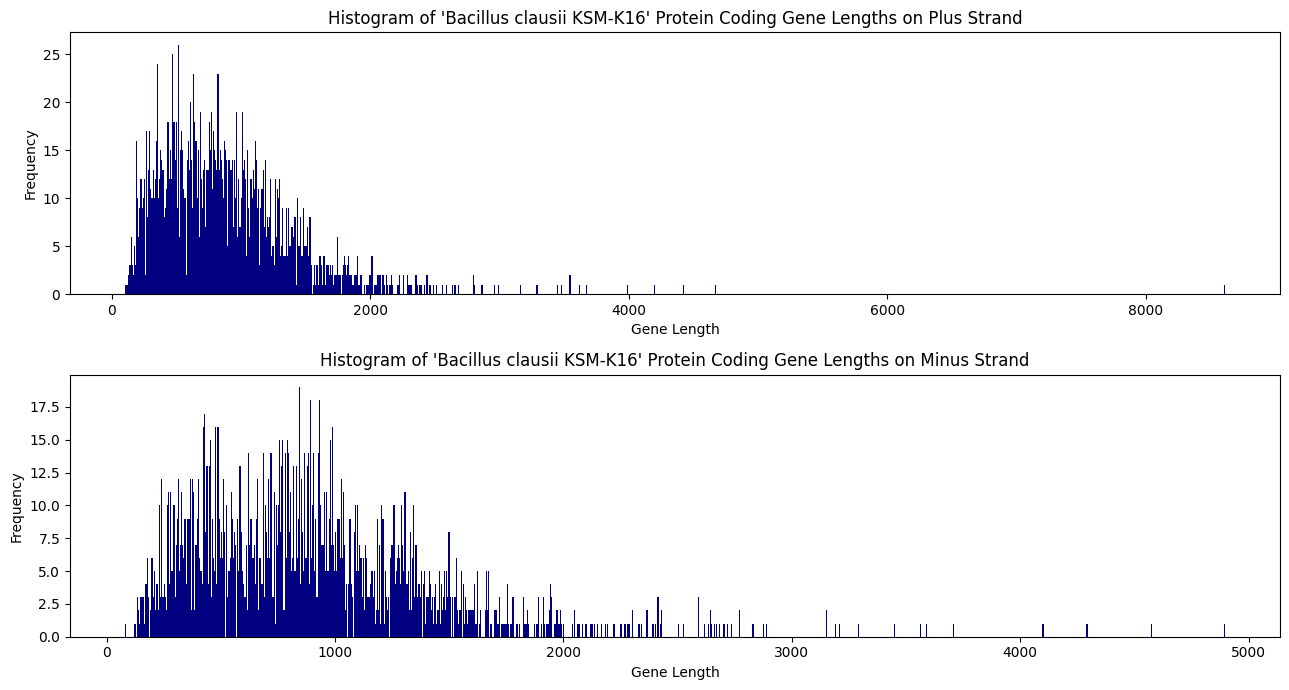

In [160]:
# Plot 2 histogram of protein coding gene lengths
fig, ax = plt.subplots(2, 1, figsize=(13,7))
ax[0].hist(protein_coding_genes_plus_lengths, bins=1000, color='navy') 
ax[0].set_xlabel('Gene Length')
ax[0].set_ylabel('Frequency')
ax[0].set_title('Histogram of \'Bacillus clausii KSM-K16\' Protein Coding Gene Lengths on Plus Strand')

ax[1].hist(protein_coding_genes_minus_lengths, bins=1000, color='navy')
ax[1].set_xlabel('Gene Length')
ax[1].set_ylabel('Frequency')
ax[1].set_title('Histogram of \'Bacillus clausii KSM-K16\' Protein Coding Gene Lengths on Minus Strand')

plt.tight_layout()
plt.show()



We can see that the CDS gene on both the plus and minus strands share the same statistical distribution of lengths.

In [161]:
protein_coding_genes_minus_characteristics = {'min': 0, 'max': 0, 'mean': 0, 'median': 0, 'std': 0}
protein_coding_genes_plus_characteristics = {'min': 0, 'max': 0, 'mean': 0, 'median': 0, 'std': 0}

# Calculating statistics for protein coding gene lengths
protein_coding_genes_plus_characteristics['mean'] = np.mean(protein_coding_genes_plus_lengths)
protein_coding_genes_plus_characteristics['median'] = np.median(protein_coding_genes_plus_lengths)
protein_coding_genes_plus_characteristics['std'] = np.std(protein_coding_genes_plus_lengths)
protein_coding_genes_plus_characteristics['max'] = max(protein_coding_genes_plus_lengths)
protein_coding_genes_plus_characteristics['min'] = min(protein_coding_genes_plus_lengths)

protein_coding_genes_minus_characteristics['mean'] = np.mean(protein_coding_genes_minus_lengths)
protein_coding_genes_minus_characteristics['median'] = np.median(protein_coding_genes_minus_lengths)
protein_coding_genes_minus_characteristics['std'] = np.std(protein_coding_genes_minus_lengths)
protein_coding_genes_minus_characteristics['max'] = max(protein_coding_genes_minus_lengths)
protein_coding_genes_minus_characteristics['min'] = min(protein_coding_genes_minus_lengths)

#create a dataframe to store the statistics
protein_coding_genes_statistics = pd.DataFrame({
    'Strand': ['Plus', 'Minus'],
    'Min': [protein_coding_genes_plus_characteristics['min'], protein_coding_genes_minus_characteristics['min']],
    'Max': [protein_coding_genes_plus_characteristics['max'], protein_coding_genes_minus_characteristics['max']],
    'Mean': [round(protein_coding_genes_plus_characteristics['mean'], 3), round(protein_coding_genes_minus_characteristics['mean'], 3)],
    'Median': [round(protein_coding_genes_plus_characteristics['median'], 3), round(protein_coding_genes_minus_characteristics['median'], 3)],
    'Std': [round(protein_coding_genes_plus_characteristics['std'], 3), round(protein_coding_genes_minus_characteristics['std'], 3)]
})


print(protein_coding_genes_statistics.to_string(index=False))


Strand  Min  Max    Mean  Median     Std
  Plus  102 8613 900.657   807.0 565.016
 Minus   81 4896 908.709   834.0 535.217


Number of tRNA genes on plus strand: 54
Number of tRNA genes on minus strand: 19


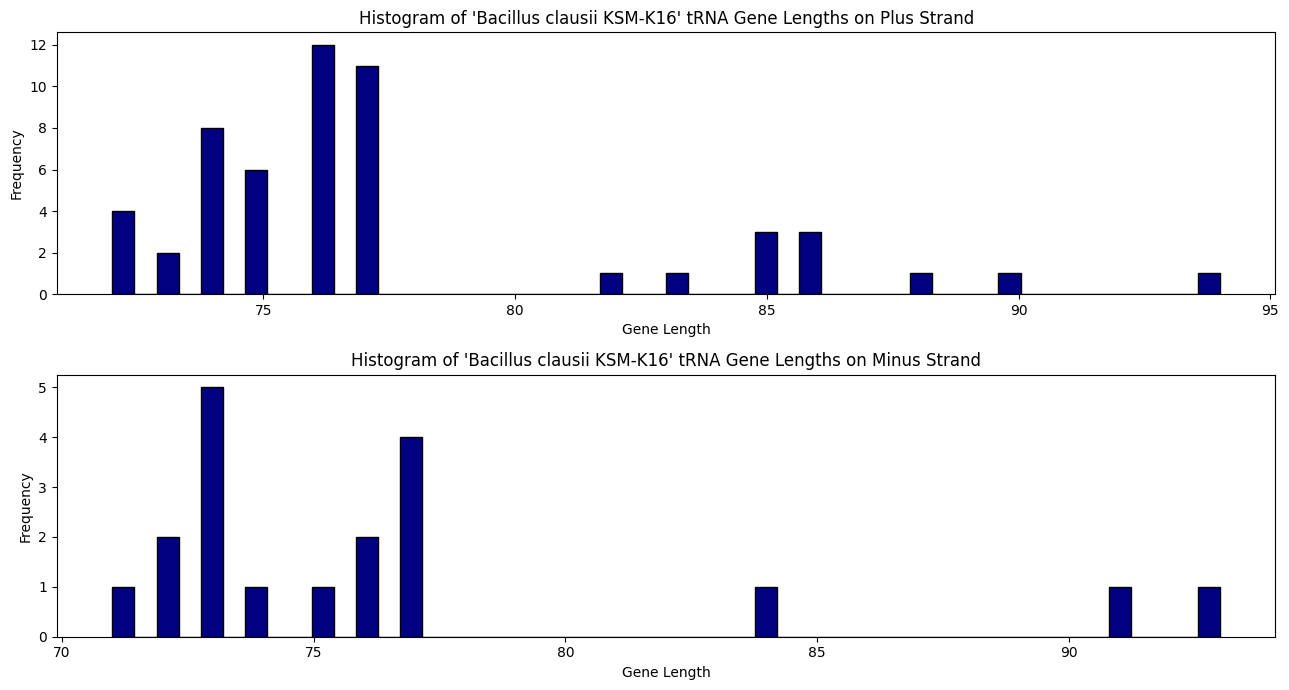

In [162]:
tRNA_coding_genes_minus_lengths = []
tRNA_coding_genes_plus_lengths = []
tRNA_coding_genes_minus_strand = 0
tRNA_coding_genes_plus_strand = 0

for feature in bacillus_clausii.features:
    if feature.type == "tRNA":
        # Calculate gene length
        gene_length = abs(feature.location.end - feature.location.start)
        if feature.location.strand == 1:
            tRNA_coding_genes_plus_lengths.append(gene_length)
            tRNA_coding_genes_plus_strand += 1
        elif feature.location.strand == -1:
            tRNA_coding_genes_minus_lengths.append(gene_length)
            tRNA_coding_genes_minus_strand += 1

print(f"Number of tRNA genes on plus strand: {tRNA_coding_genes_plus_strand}")
print(f"Number of tRNA genes on minus strand: {tRNA_coding_genes_minus_strand}")

# Plot 2 histogram of tRNA coding gene lengths
fig, ax = plt.subplots(2, 1, figsize=(13,7))
ax[0].hist(tRNA_coding_genes_plus_lengths, bins=50, color='navy', edgecolor='black')
ax[0].set_xlabel('Gene Length')
ax[0].set_ylabel('Frequency')
ax[0].set_title('Histogram of \'Bacillus clausii KSM-K16\' tRNA Gene Lengths on Plus Strand')

ax[1].hist(tRNA_coding_genes_minus_lengths, bins=50, color='navy', edgecolor='black')
ax[1].set_xlabel('Gene Length')
ax[1].set_ylabel('Frequency')
ax[1].set_title('Histogram of \'Bacillus clausii KSM-K16\' tRNA Gene Lengths on Minus Strand')

plt.tight_layout()
plt.show()


In [163]:
# Calculating statistics for tRNA coding gene lengths
tRNA_coding_genes_plus_characteristics = {'min': 0, 'max': 0, 'mean': 0, 'median': 0, 'std': 0}
tRNA_coding_genes_minus_characteristics = {'min': 0, 'max': 0, 'mean': 0, 'median': 0, 'std': 0}

tRNA_coding_genes_plus_characteristics['mean'] = np.mean(tRNA_coding_genes_plus_lengths)
tRNA_coding_genes_plus_characteristics['median'] = np.median(tRNA_coding_genes_plus_lengths)
tRNA_coding_genes_plus_characteristics['std'] = np.std(tRNA_coding_genes_plus_lengths)
tRNA_coding_genes_plus_characteristics['max'] = max(tRNA_coding_genes_plus_lengths)
tRNA_coding_genes_plus_characteristics['min'] = min(tRNA_coding_genes_plus_lengths)

tRNA_coding_genes_minus_characteristics['mean'] = np.mean(tRNA_coding_genes_minus_lengths)
tRNA_coding_genes_minus_characteristics['median'] = np.median(tRNA_coding_genes_minus_lengths)
tRNA_coding_genes_minus_characteristics['std'] = np.std(tRNA_coding_genes_minus_lengths)
tRNA_coding_genes_minus_characteristics['max'] = max(tRNA_coding_genes_minus_lengths)
tRNA_coding_genes_minus_characteristics['min'] = min(tRNA_coding_genes_minus_lengths)

#create a dataframe to store the statistics
tRNA_coding_genes_statistics = pd.DataFrame({
    'Strand': ['Plus', 'Minus'],
    'Min': [tRNA_coding_genes_plus_characteristics['min'], tRNA_coding_genes_minus_characteristics['min']],
    'Max': [tRNA_coding_genes_plus_characteristics['max'], tRNA_coding_genes_minus_characteristics['max']],
    'Mean': [round(tRNA_coding_genes_plus_characteristics['mean'], 3), round(tRNA_coding_genes_minus_characteristics['mean'], 3)],
    'Median': [round(tRNA_coding_genes_plus_characteristics['median'], 3), round(tRNA_coding_genes_minus_characteristics['median'], 3)],
    'Std': [round(tRNA_coding_genes_plus_characteristics['std'], 3), round(tRNA_coding_genes_minus_characteristics['std'], 3)]
})

print(tRNA_coding_genes_statistics.to_string(index=False))

Strand  Min  Max   Mean  Median   Std
  Plus   72   94 77.500    76.0 4.909
 Minus   71   93 76.684    75.0 5.983


Number of rRNA genes on plus strand: 22
Number of rRNA genes on minus strand: 0


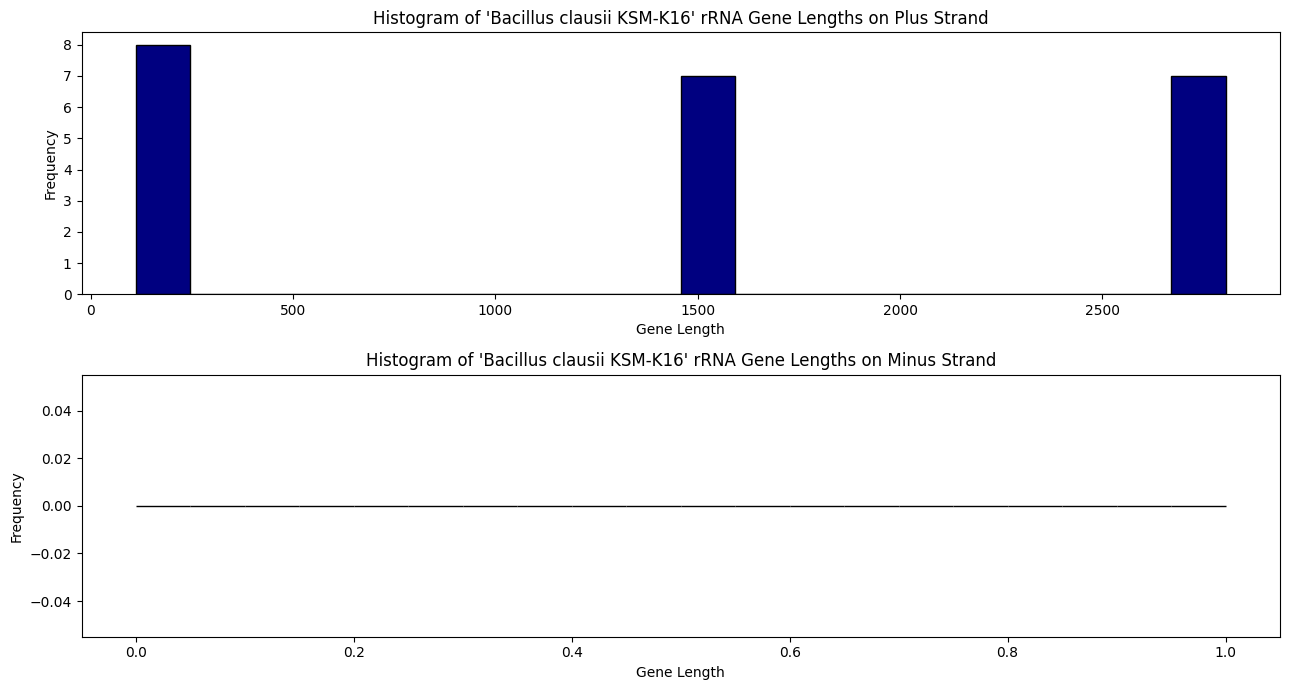

In [164]:
rRNA_coding_genes_minus_lengths = []
rRNA_coding_genes_plus_lengths = []
rRNA_coding_genes_minus_strand = 0
rRNA_coding_genes_plus_strand = 0

for feature in bacillus_clausii.features:
    if feature.type == "rRNA":
        # Calculate gene length
        gene_length = abs(feature.location.end - feature.location.start)
        if feature.location.strand == 1:
            rRNA_coding_genes_plus_lengths.append(gene_length)
            rRNA_coding_genes_plus_strand += 1
        elif feature.location.strand == -1:
            rRNA_coding_genes_minus_lengths.append(gene_length)
            rRNA_coding_genes_minus_strand += 1

print(f"Number of rRNA genes on plus strand: {rRNA_coding_genes_plus_strand}")
print(f"Number of rRNA genes on minus strand: {rRNA_coding_genes_minus_strand}")

# Plot 2 histogram of rRNA coding gene lengths
fig, ax = plt.subplots(2, 1, figsize=(13,7))
ax[0].hist(rRNA_coding_genes_plus_lengths, bins=20, color='navy', edgecolor='black')
ax[0].set_xlabel('Gene Length')
ax[0].set_ylabel('Frequency')
ax[0].set_title('Histogram of \'Bacillus clausii KSM-K16\' rRNA Gene Lengths on Plus Strand')

ax[1].hist(rRNA_coding_genes_minus_lengths, bins=20, color='navy', edgecolor='black')
ax[1].set_xlabel('Gene Length')
ax[1].set_ylabel('Frequency')
ax[1].set_title('Histogram of \'Bacillus clausii KSM-K16\' rRNA Gene Lengths on Minus Strand')

plt.tight_layout()
plt.show()

In [165]:
# Calculating statistics for rRNA coding gene lengths
rRNA_coding_genes_plus_characteristics = {'min': 0, 'max': 0, 'mean': 0, 'median': 0, 'std': 0}
rRNA_coding_genes_minus_characteristics = {'min': 0, 'max': 0, 'mean': 0, 'median': 0, 'std': 0}

rRNA_coding_genes_plus_characteristics['mean'] = np.mean(rRNA_coding_genes_plus_lengths)
rRNA_coding_genes_plus_characteristics['median'] = np.median(rRNA_coding_genes_plus_lengths)
rRNA_coding_genes_plus_characteristics['std'] = np.std(rRNA_coding_genes_plus_lengths)
rRNA_coding_genes_plus_characteristics['max'] = max(rRNA_coding_genes_plus_lengths)
rRNA_coding_genes_plus_characteristics['min'] = min(rRNA_coding_genes_plus_lengths)


#create a dataframe to store the statistics
rRNA_coding_genes_statistics = pd.DataFrame({
    'Strand': ['Plus', 'Minus'],
    'Min': [rRNA_coding_genes_plus_characteristics['min'], rRNA_coding_genes_minus_characteristics['min']],
    'Max': [rRNA_coding_genes_plus_characteristics['max'], rRNA_coding_genes_minus_characteristics['max']],
    'Mean': [round(rRNA_coding_genes_plus_characteristics['mean'], 3), round(rRNA_coding_genes_minus_characteristics['mean'], 3)],
    'Median': [round(rRNA_coding_genes_plus_characteristics['median'], 3), round(rRNA_coding_genes_minus_characteristics['median'], 3)],
    'Std': [round(rRNA_coding_genes_plus_characteristics['std'], 3), round(rRNA_coding_genes_minus_characteristics['std'], 3)]
})

print(rRNA_coding_genes_statistics.to_string(index=False))


Strand  Min  Max     Mean  Median      Std
  Plus  112 2804 1427.682  1551.0 1110.503
 Minus    0    0    0.000     0.0    0.000


In [166]:
# Printing all the datagrams
print("protein coding genes statistics")
print(protein_coding_genes_statistics.to_string(index=False))
print('\ntRNA coding genes statistics')
print(tRNA_coding_genes_statistics.to_string(index=False))
print('\nrRNA coding genes statistics')
print(rRNA_coding_genes_statistics.to_string(index=False))



protein coding genes statistics
Strand  Min  Max    Mean  Median     Std
  Plus  102 8613 900.657   807.0 565.016
 Minus   81 4896 908.709   834.0 535.217

tRNA coding genes statistics
Strand  Min  Max   Mean  Median   Std
  Plus   72   94 77.500    76.0 4.909
 Minus   71   93 76.684    75.0 5.983

rRNA coding genes statistics
Strand  Min  Max     Mean  Median      Std
  Plus  112 2804 1427.682  1551.0 1110.503
 Minus    0    0    0.000     0.0    0.000


As we can see, for protein coding genes, the amount of genes in each strand is pretty similar, and the lengths of the CDS gene on both the plus and minus strands share the same statistical distribution of lengths. For tRNA genes, we also can say that the amount of genes in each strand is pretty similar, and the lengths of the tRNA gene on both the plus and minus strands share the same statistical distribution of lengths. for rRNA genes, on the other hand, we can see that only the plus strand contains rRNA genes. also we can see that the Bacillus clausii genome has a higher amount of protein coding genes than tRNA and rRNA genes. 